In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("customer_support_tickets.csv")
print("Shape:", data.shape)
data.head(15)

Shape: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [3]:
data = data.dropna(subset=['Customer Satisfaction Rating'])


data.drop(['Ticket ID', 'Customer Name', 'Customer Email',
           'Ticket Subject', 'Ticket Description', 'Resolution'], axis=1, inplace=True)


data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')


data['Resolution Hours'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600
data['Resolution Hours'].fillna(data['Resolution Hours'].median(), inplace=True)


data.drop(['Date of Purchase', 'First Response Time', 'Time to Resolution'], axis=1, inplace=True)


In [4]:
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col].astype(str))


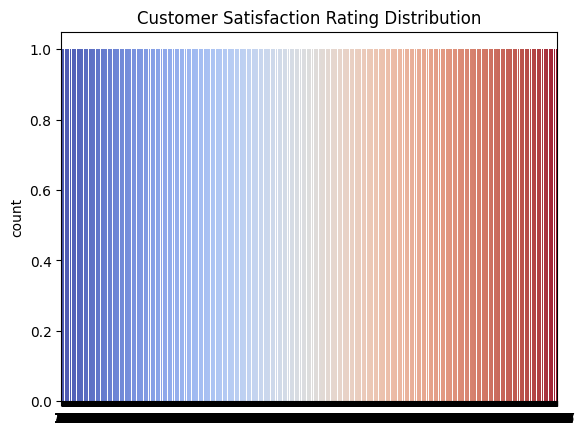

In [5]:
sns.countplot(data['Customer Satisfaction Rating'], palette='coolwarm')
plt.title("Customer Satisfaction Rating Distribution")
plt.show()


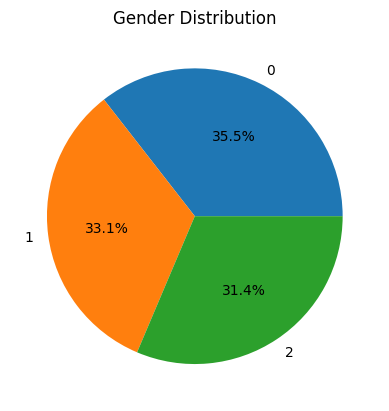

In [6]:
data['Customer Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


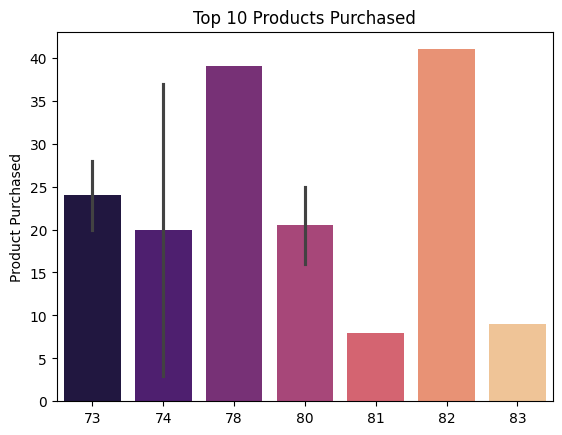

In [7]:
top_products = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette='magma')
plt.title("Top 10 Products Purchased")
plt.show()


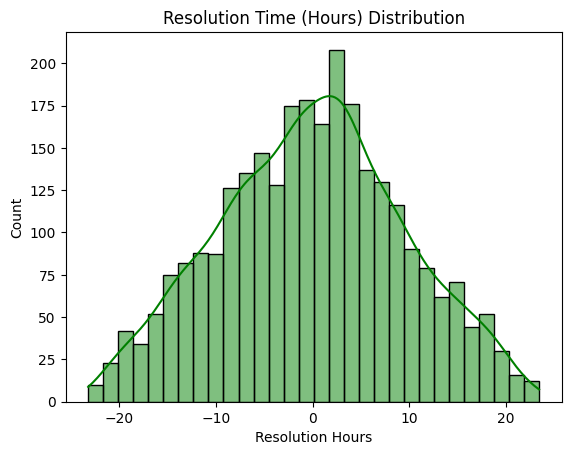

In [8]:
sns.histplot(data['Resolution Hours'], bins=30, kde=True, color='green')
plt.title("Resolution Time (Hours) Distribution")
plt.show()


In [9]:
X = data.drop("Customer Satisfaction Rating", axis=1)
y = data["Customer Satisfaction Rating"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [13]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.2003610108303249
Classification Report:
               precision    recall  f1-score   support

         1.0       0.16      0.17      0.16       109
         2.0       0.19      0.18      0.18       117
         3.0       0.22      0.26      0.24       112
         4.0       0.21      0.22      0.22       108
         5.0       0.22      0.18      0.19       108

    accuracy                           0.20       554
   macro avg       0.20      0.20      0.20       554
weighted avg       0.20      0.20      0.20       554

Confusion Matrix:
 [[18 24 24 24 19]
 [20 21 35 22 19]
 [27 22 29 23 11]
 [23 23 18 24 20]
 [25 22 23 19 19]]


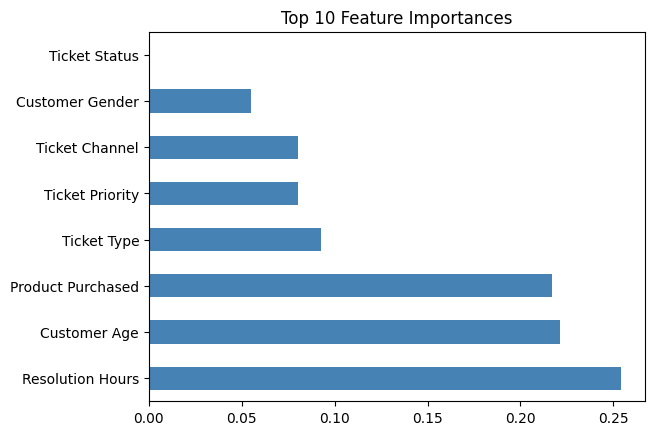

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='steelblue')
plt.title("Top 10 Feature Importances")
plt.show()
